In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import io

Image Shape: (1240, 1754, 4)
[[[228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]
  ...
  [228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]]

 [[228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]
  ...
  [228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]]

 [[228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]
  ...
  [228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]]

 ...

 [[228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]
  ...
  [228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]]

 [[228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]
  ...
  [228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]]

 [[228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]
  ...
  [228 222 186 255]
  [228 222 186 255]
  [228 222 186 255]]]


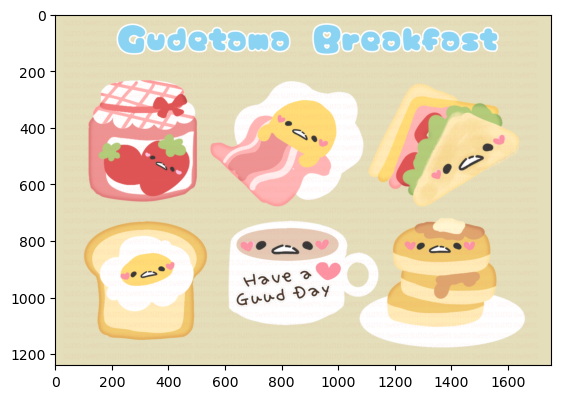

In [2]:
orig_img = io.imread('imgcolour.png')
plt.imshow(orig_img)
plt.plot()
row = orig_img.shape[0]
col = orig_img.shape[1]
lay = orig_img.shape[2]
print('Image Shape:', orig_img.shape)#layers as a shade/filter of the image that gives its raw app
print(orig_img)

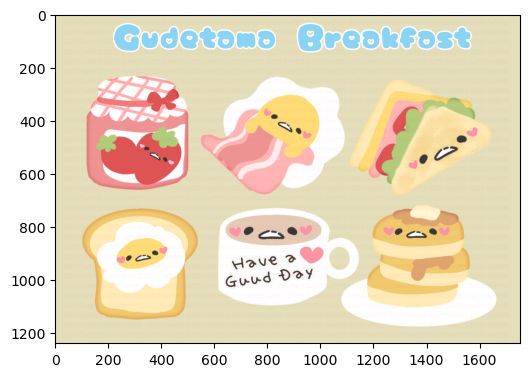

In [3]:
img = orig_img.copy()
plt.figure(figsize=(6,6))
plt.imshow(img)

In [4]:

# Reshape to a 2D shape
# rows x columns, layers
img = img.reshape( (row*col, lay) )


# Model Fitting

In [104]:
# Define k-clusters (groups of colours)
k = 6
clt = KMeans(n_clusters = k)

# Apply the model
clt.fit(img)

KMeans(n_clusters=6)

In [105]:
# Create an array with size k
clt.labels_

# Results show datapoints belonging to the group specified as a number

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
# Use a historgram to observe number of colours and how much is in the image
label_indx = np.arange(0, len(np.unique(clt.labels_)) + 1)

In [107]:
# Each data point will have a colour class label
# More colours appearing means more data points are associated with the colour class
np.histogram(clt.labels_, bins = label_indx)

(array([ 337255, 1432548,  129635,  196985,   61698,   16839], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6]))

In [108]:
# Save the first array
(hist,_) = np.histogram(clt.labels_, bins = label_indx)

In [109]:
# Normalize the historgram so the values sum to 1
hist = hist.astype("float")
hist /= hist.sum()
# Display the proportion of each colour class
hist

array([0.15506262, 0.65865487, 0.0596034 , 0.09056948, 0.02836742,
       0.00774221])

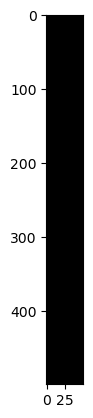

In [110]:
# Create a grid to hold colours and their corresponding proportions
# These are row, col displayed
hist_bar = np.zeros((500,50,3), dtype='uint8')

The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

--> index_a 0 paired with index_b 0 and so on and zipped as
( (a0, b0), (a1, b1) .... (an, bn) )

In [111]:
# Loop over percentage of each cluster and colour of each cluster
# Each iter iters over 2 arrays containing colour freq. and the cluster centers

startX = 0
for (percent,colour) in zip(hist, clt.cluster_centers_):
    endX = startX + (percent * 500) # to match grid, find the end of the proportion
    # (width, height)
    
    cv2.rectangle(hist_bar, (0,int(startX)), (50,int(endX)),
                 colour.astype("uint8").tolist(),-1)
    cv2.putText(hist_bar,str(percent*100), (0, int(endX)-5 ),cv2.FONT_HERSHEY_SIMPLEX,0.2,(0,0,0),1,cv2.LINE_AA )
    percentage.append(percent*100)
    startX = endX


15.506262184132122
65.86548718137345
5.960339500496561
9.056948173759517
2.8367418251370142
0.7742211351013352


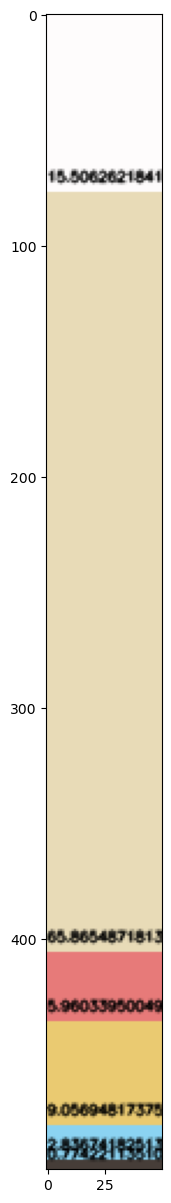

In [112]:

plt.figure( figsize=(15, 15) )
for percent in hist:
    print(percent*100)
plt.imshow(hist_bar)
plt.show()